

## Convolutional Neural Networks

---

In this notebook, we train a CNN to classify images from the CIFAR-10 database.

### 1. Load CIFAR-10 Database

In [1]:
import keras
from keras.datasets import cifar10

# load the pre-shuffled train and test data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

Using TensorFlow backend.


170508288/170498071 [==============================] - 28s 0us/step


### 2. Visualize the First 24 Training Images

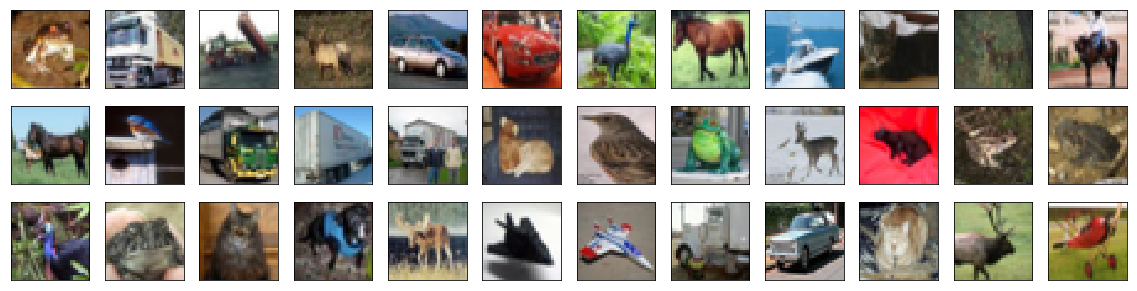

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(20,5))
for i in range(36):
    ax = fig.add_subplot(3, 12, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_train[i]))

### 3. Rescale the Images by Dividing Every Pixel in Every Image by 255

In [3]:
# rescale [0,255] --> [0,1]
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

### 4.  Break Dataset into Training, Testing, and Validation Sets

In [4]:
from keras.utils import np_utils

# one-hot encode the labels
num_classes = len(np.unique(y_train))
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# break training set into training and validation sets
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# print shape of training set
print('x_train shape:', x_train.shape)

# print number of training, validation, and test images
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_valid.shape[0], 'validation samples')

('x_train shape:', (45000, 32, 32, 3))
(45000, 'train samples')
(10000, 'test samples')
(5000, 'validation samples')


### 5. Define the Model Architecture 

In [10]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()
model.add(Conv2D(filters=16, kernel_size=2, padding='same', activation='relu', 
                        input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=128, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 32, 32, 16)        208       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 16, 16, 32)        2080      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 8, 8, 64)          8256      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 4, 4, 64)          0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 4, 4, 128)         32896     
__________

### 6. Compile the Model 

In [11]:
# compile the model
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
                  metrics=['accuracy'])

### 7. Train the Model 

In [12]:
from keras.callbacks import ModelCheckpoint   

# train the model
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=1, 
                               save_best_only=True)
hist = model.fit(x_train, y_train, batch_size=256, epochs=100,
          validation_data=(x_valid, y_valid), callbacks=[checkpointer], 
          verbose=1, shuffle=True)

Train on 45000 samples, validate on 5000 samples
Epoch 1/100
45000/45000 [==============================] - 39s 861us/step - loss: 1.9719 - acc: 0.2772 - val_loss: 1.7122 - val_acc: 0.3854

Epoch 00001: val_loss improved from inf to 1.71217, saving model to model.weights.best.hdf5
Epoch 2/100
45000/45000 [==============================] - 39s 861us/step - loss: 1.6632 - acc: 0.3956 - val_loss: 1.4793 - val_acc: 0.4754

Epoch 00002: val_loss improved from 1.71217 to 1.47929, saving model to model.weights.best.hdf5
Epoch 3/100
45000/45000 [==============================] - 39s 868us/step - loss: 1.5235 - acc: 0.4452 - val_loss: 1.4619 - val_acc: 0.4766

Epoch 00003: val_loss improved from 1.47929 to 1.46187, saving model to model.weights.best.hdf5
Epoch 4/100
45000/45000 [==============================] - 39s 877us/step - loss: 1.4410 - acc: 0.4764 - val_loss: 1.3947 - val_acc: 0.4992

Epoch 00004: val_loss improved from 1.46187 to 1.39466, saving model to model.weights.best.hdf5
Epoch 5

45000/45000 [==============================] - 39s 858us/step - loss: 0.6384 - acc: 0.7729 - val_loss: 0.8686 - val_acc: 0.7002

Epoch 00039: val_loss did not improve from 0.81792
Epoch 40/100
45000/45000 [==============================] - 39s 859us/step - loss: 0.6331 - acc: 0.7744 - val_loss: 0.8181 - val_acc: 0.7196

Epoch 00040: val_loss did not improve from 0.81792
Epoch 41/100
45000/45000 [==============================] - 39s 857us/step - loss: 0.6245 - acc: 0.7790 - val_loss: 0.8259 - val_acc: 0.7124

Epoch 00041: val_loss did not improve from 0.81792
Epoch 42/100
45000/45000 [==============================] - 39s 861us/step - loss: 0.6183 - acc: 0.7803 - val_loss: 0.8087 - val_acc: 0.7208

Epoch 00042: val_loss improved from 0.81792 to 0.80869, saving model to model.weights.best.hdf5
Epoch 43/100
45000/45000 [==============================] - 39s 863us/step - loss: 0.6114 - acc: 0.7788 - val_loss: 0.8237 - val_acc: 0.7154

Epoch 00043: val_loss did not improve from 0.80869
Epo

45000/45000 [==============================] - 39s 861us/step - loss: 0.4436 - acc: 0.8426 - val_loss: 0.8507 - val_acc: 0.7240

Epoch 00081: val_loss did not improve from 0.79872
Epoch 82/100
45000/45000 [==============================] - 39s 864us/step - loss: 0.4455 - acc: 0.8410 - val_loss: 0.9049 - val_acc: 0.7148

Epoch 00082: val_loss did not improve from 0.79872
Epoch 83/100
45000/45000 [==============================] - 39s 877us/step - loss: 0.4416 - acc: 0.8438 - val_loss: 0.8591 - val_acc: 0.7232

Epoch 00083: val_loss did not improve from 0.79872
Epoch 84/100
45000/45000 [==============================] - 39s 871us/step - loss: 0.4369 - acc: 0.8449 - val_loss: 0.8971 - val_acc: 0.7248

Epoch 00084: val_loss did not improve from 0.79872
Epoch 85/100
45000/45000 [==============================] - 39s 873us/step - loss: 0.4315 - acc: 0.8464 - val_loss: 0.9020 - val_acc: 0.7152

Epoch 00085: val_loss did not improve from 0.79872
Epoch 86/100
45000/45000 [======================

### 8. Load the Model with the Best Validation Accuracy

In [13]:
# load the weights that yielded the best validation accuracy
model.load_weights('model.weights.best.hdf5')

### 9. Calculate Classification Accuracy on Test Set

In [14]:
# evaluate and print test accuracy
score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])

('\n', 'Test accuracy:', 0.7179)


### 10. Visualize Some Predictions

This may give you some insight into why the network is misclassifying certain objects.

In [15]:
# get predictions on the test set
y_hat = model.predict(x_test)

# define text labels (source: https://www.cs.toronto.edu/~kriz/cifar.html)
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

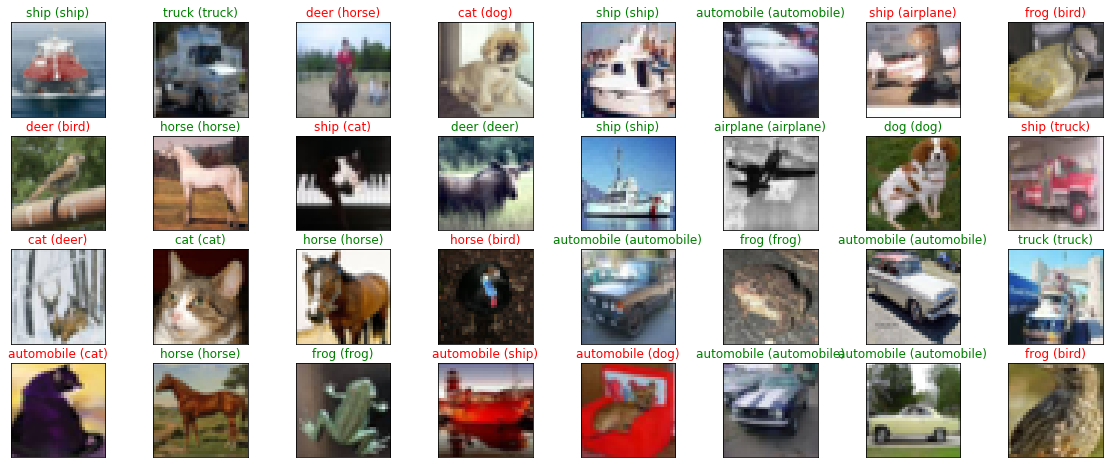

In [16]:
# plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=32, replace=False)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(cifar10_labels[pred_idx], cifar10_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))